In [1]:
#DATA SCIENCE PROYECT EXAMPLE

#PREPARE THE DATA

In [19]:
#Import pandas and numpy libraries and define the dataset, in this case "data.csv"

import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')



In [3]:
#Replace ? -> naN in database

data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

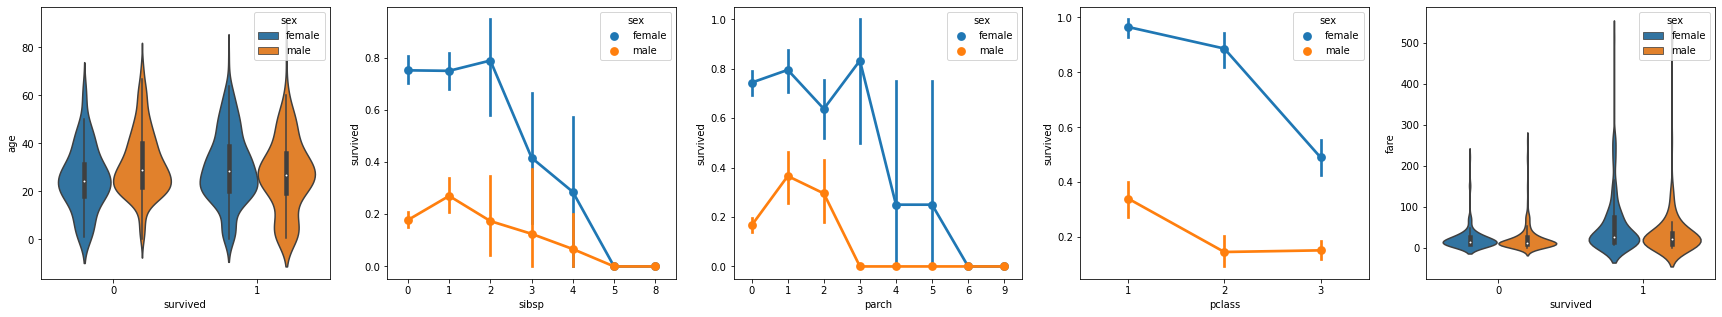

In [4]:
#Import seaborn and matplotlib to plot the data


import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
#Replace str gender data to binary data 



data.replace({'male': 1, 'female': 0}, inplace=True)



In [6]:
#Calculate correlation between atributes of data

data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [7]:
#Clean the database sorting columns and dropping observations with incomplete information 

data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [8]:
#TRAIN AND EVALUATE THE MODEL

In [9]:
#Divide the data into training and validation data.(20% to train)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [10]:
#Normalize the inputs to get the same range of values in all data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [11]:
#Choosing and train the model to use, in this case is the Naive Bayes algorithm

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
#Predict and get metrics using test data (%)

from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [13]:
#NEURAL NETWORK TO INCREASE ACCURACY

In [14]:
#import model and layers and create the model

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [15]:
#Creating the layers of the neural network  

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [16]:

#Summary of the model 


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [17]:
#COMPILATION AND TRAIN THE MODEL, DEFINING OPTIMIZER, LOSS AND METRICS


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.5861
Epoch 11/50
27/27 [

In [18]:
#PREDICT USING THE TEST DATA AND OBTAIN ACCURACY (%)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
print(metrics.accuracy_score(y_test, y_pred))


0.8181818181818182
